# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf  
from time import time 
import datetime
from statsmodels.tsa.stattools import adfuller 

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing

In [2]:
#importing TCS[TATA CONSULTANCY SERVICES] stock data from NATIONAL STOCK EXCHANGE[NS]
ticker="TCS.NS"
data=yf.Ticker(ticker)

In [3]:
end_date=datetime.date.today()
end_date

datetime.date(2024, 7, 12)

In [4]:
start_date=end_date-datetime.timedelta(days=730)
start_date

datetime.date(2022, 7, 13)

In [5]:
tomorrow_date=end_date+datetime.timedelta(days=1)
tomorrow_date

datetime.date(2024, 7, 13)

In [6]:
prices=data.history(start=start_date,end=end_date).Close
prices.head()

Date
2022-07-13 00:00:00+05:30    2891.326904
2022-07-14 00:00:00+05:30    2860.799072
2022-07-15 00:00:00+05:30    2856.839844
2022-07-18 00:00:00+05:30    2922.570557
2022-07-19 00:00:00+05:30    2932.825684
Name: Close, dtype: float64

In [7]:
prices_df=pd.DataFrame(prices)
prices_df.columns=['prices']
prices_df.head()

,prices
Date,
2022-07-13 00:00:00+05:30,2891.326904
2022-07-14 00:00:00+05:30,2860.799072
2022-07-15 00:00:00+05:30,2856.839844
2022-07-18 00:00:00+05:30,2922.570557
2022-07-19 00:00:00+05:30,2932.825684


In [8]:
returns=prices.pct_change().dropna()
returns_df=pd.DataFrame(returns)
returns_df.columns=['returns']
returns_df.head()

,returns
Date,
2022-07-14 00:00:00+05:30,-0.010558
2022-07-15 00:00:00+05:30,-0.001384
2022-07-18 00:00:00+05:30,0.023008
2022-07-19 00:00:00+05:30,0.003509
2022-07-20 00:00:00+05:30,0.029454


In [9]:
# DICKEY FULLER TEST FUNCTION
def af_test(prices):
    result=adfuller(prices)
    labels=['AD TEST STATISTICS','p-value','Lags Used','No.Of.Observations Used']
    for i,j in zip(result,labels):
        print(j+" : "+str(i))
    if(result[1]>0.05):
        print("DATA IS NOT STATIONARY")
    else:
        print("DATA IS STATIONARY")

In [10]:
af_test(prices_df['prices'])

AD TEST STATISTICS : -1.3809877093995377
p-value : 0.5913561519286593
Lags Used : 0
No.Of.Observations Used : 490
DATA IS NOT STATIONARY


Text(0.5, 1.0, 'Time-Series plot for Prices')

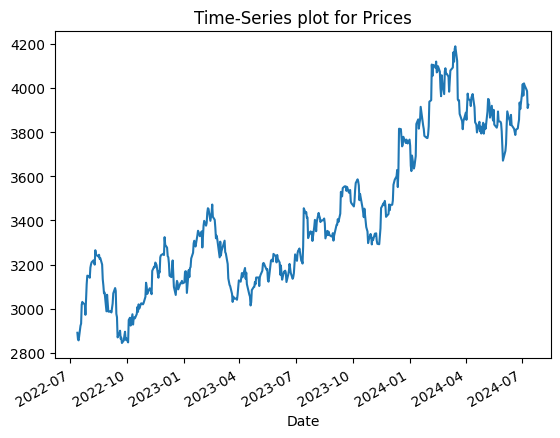

In [11]:
fig1=prices_df['prices'].plot()
fig1.set_title("Time-Series plot for Prices")

In [12]:
af_test(returns_df['returns'])

AD TEST STATISTICS : -22.553831854612245
p-value : 0.0
Lags Used : 0
No.Of.Observations Used : 489
DATA IS STATIONARY


Text(0.5, 1.0, 'Time-Series plot for Returns')

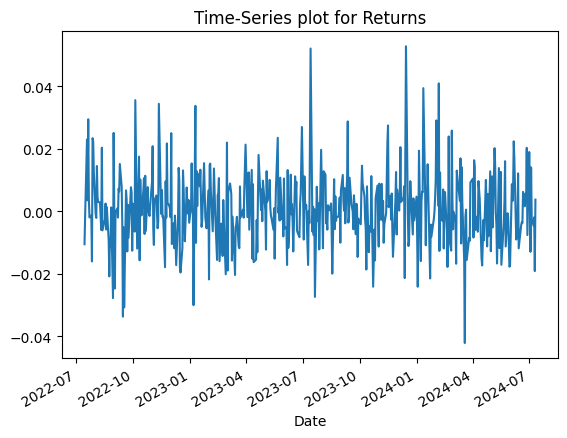

In [13]:
fig12=returns_df['returns'].plot()
fig12.set_title("Time-Series plot for Returns")

In [14]:
prices_df['first difference']=prices_df['prices']-prices_df['prices'].shift(1)
prices_df.head()

,prices,first difference
Date,,
2022-07-13 00:00:00+05:30,2891.326904,NaN
2022-07-14 00:00:00+05:30,2860.799072,-30.527832
2022-07-15 00:00:00+05:30,2856.839844,-3.959229
2022-07-18 00:00:00+05:30,2922.570557,65.730713
2022-07-19 00:00:00+05:30,2932.825684,10.255127


In [15]:
af_test(prices_df['first difference'].dropna())

AD TEST STATISTICS : -22.4608710663162
p-value : 0.0
Lags Used : 0
No.Of.Observations Used : 489
DATA IS STATIONARY


Text(0.5, 1.0, 'Time Series Plot after Differencing')

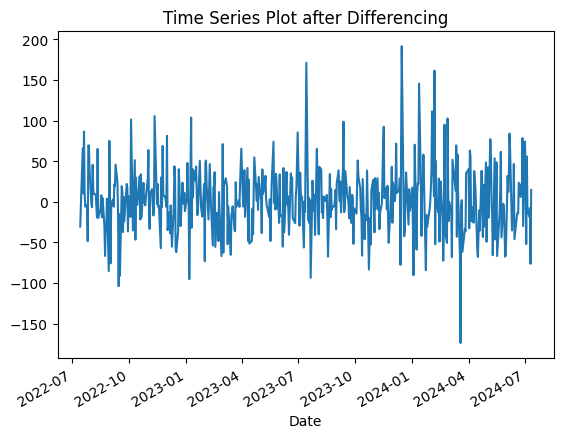

In [16]:
fig2=prices_df['first difference'].plot()
fig2.set_title("Time Series Plot after Differencing")

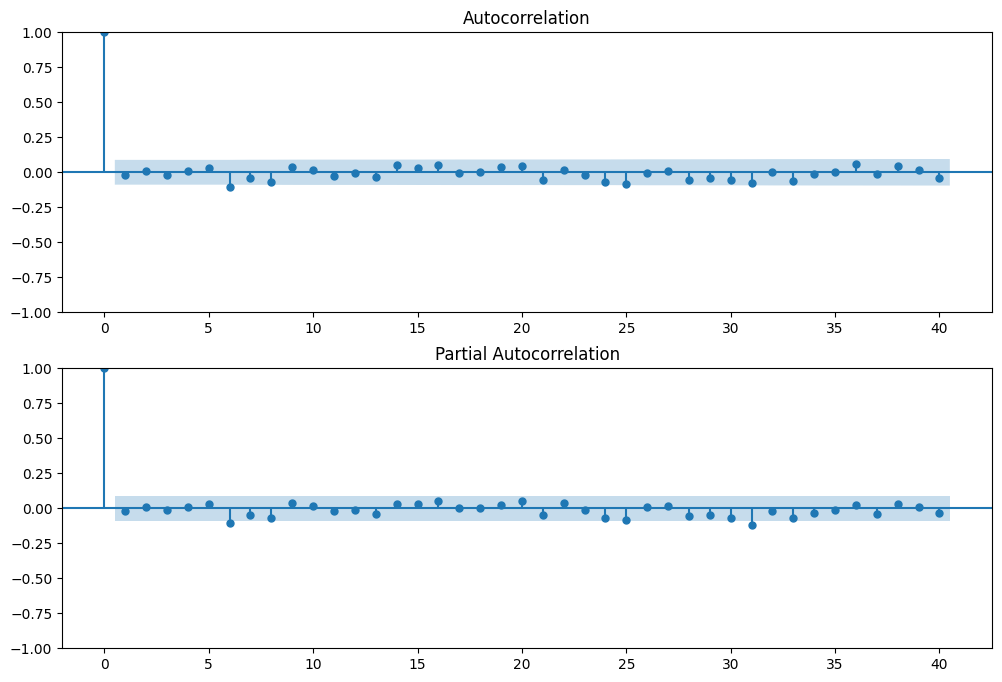

In [17]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(prices_df['first difference'].dropna(),lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(prices_df['first difference'].dropna(),lags=40,ax=ax2)

In [18]:
# ACF AND PACF DOES NOT HELP SIGNIFICANTLY IN CHOOSING BETWEEN AR AND MA Model
# SO WE ARE FINDING THE BEST p,d,q BY TRIAL AND ERROR 

# Building ARIMA Model For Stock-Prices

In [19]:
model1=ARIMA(prices_df['prices'],order=(7,0,6))
model1_fit=model1.fit()
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 prices   No. Observations:                  491
Model:                 ARIMA(7, 0, 6)   Log Likelihood               -2521.344
Date:                Fri, 12 Jul 2024   AIC                           5072.689
Time:                        20:03:54   BIC                           5135.635
Sample:                             0   HQIC                          5097.408
                                - 491                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3416.4277    265.276     12.879      0.000    2896.496    3936.359
ar.L1          1.2613      0.444      2.842      0.004       0.392       2.131
ar.L2          0.0240      0.590      0.041      0.968      -1.133       1.181
ar.L3         -0.7376      0.425     -1.734      0.083      -1.571       0.096
ar.L4          0.3530      0.558      0.633      0.527      -0.741       1.447
ar.L5          0.6522      0.409      1.594      0.111      -0.150       1.454
ar.L6         -0.5474      0.595     -0.920      0.358      -1.714       0.619
ar.L7         -0.0072      0.405     -0.018      0.986      -0.801       0.787
ma.L1         -0.2784      0.438     -0.636      0.525      -1.137       0.580
ma.L2         -0.2578      0.280     -0.920      0.358      -0.807       0.291
ma.L3          0.4531      0.332      1.363      0.173      -0.198       1.105
ma.L4          0.1012      0.316      0.320      0.749      -0.519       0.721
ma.L5         -0.5392      0.299     -1.805      0.071      -1.125       0.046
ma.L6         -0.1181      0.424     -0.279      0.781      -0.949       0.713
sigma2      1680.9209     84.743     19.835      0.000    1514.827    1847.015
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               115.61
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.64   Skew:                             0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
#Predicting stock prices for 200 days
prices_df['forecast']=model1_fit.predict(start=0,end=200,dynamic=False)
prices_df.head(135)

,prices,first difference,forecast
Date,,,
2022-07-13 00:00:00+05:30,2891.326904,NaN,3416.427712
2022-07-14 00:00:00+05:30,2860.799072,-30.527832,2894.205258
2022-07-15 00:00:00+05:30,2856.839844,-3.959229,2864.050134
2022-07-18 00:00:00+05:30,2922.570557,65.730713,2859.226774
2022-07-19 00:00:00+05:30,2932.825684,10.255127,2924.938088
...,...,...,...
2023-01-19 00:00:00+05:30,3291.609131,-16.491455,3302.956994
2023-01-20 00:00:00+05:30,3281.851074,-9.758057,3296.520996
2023-01-23 00:00:00+05:30,3332.399170,50.548096,3279.541533


<Axes: xlabel='Date'>

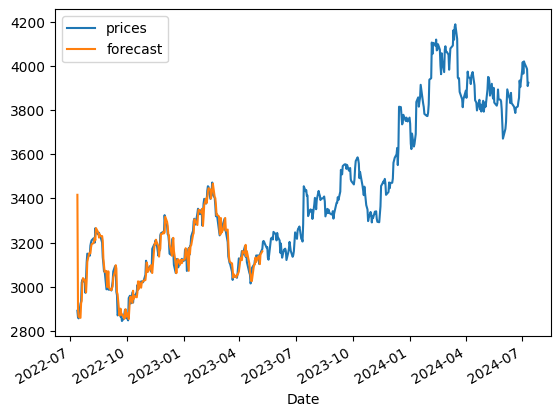

In [21]:
prices_df[['prices','forecast']].plot()

In [22]:
#THE MODEL WORKS PERFECTLY FINE

In [23]:
#PERFORMING THE FORECAST for the next day after "end-date"
next_days_price=model1_fit.forecast(100,alpha=0.01)
next_days_price.iloc[0]

3910.244646609054

# Building SARIMAX Model For Returns

In [24]:
af_test(returns_df['returns'])

AD TEST STATISTICS : -22.553831854612245
p-value : 0.0
Lags Used : 0
No.Of.Observations Used : 489
DATA IS STATIONARY


In [25]:
# HERE WE CAN SEE THAT THE 'RETURNS' DATA IS STATIONARY
# Even if the data appears stationary visually, differencing might be a pre-processing step to ensure compatibility with the chosen model
# The chosen model here is SARIMAX

In [ ]:
#TRYING TO PREDICT RETURNS PERCENTAGE USING SARIMAX
model2=sm.tsa.statespace.SARIMAX(returns_df['returns'],order=(1,2,1),seasonal_order=(1,2,1,24))
model2_fit=model2.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.80515D+00    |proj g|=  1.46955D+01


 This problem is unconstrained.



At iterate    5    f= -2.04974D+00    |proj g|=  2.17449D-01

At iterate   10    f= -2.05937D+00    |proj g|=  5.97628D+00

At iterate   15    f= -2.09664D+00    |proj g|=  1.14601D-01

At iterate   20    f= -2.10023D+00    |proj g|=  3.31282D+00

At iterate   25    f= -2.11913D+00    |proj g|=  1.22472D-01

At iterate   30    f= -2.12327D+00    |proj g|=  1.64260D-01

At iterate   35    f= -2.15133D+00    |proj g|=  5.62006D-01

At iterate   40    f= -2.16392D+00    |proj g|=  2.07475D+00


In [ ]:
#Predicting The returns for 400 days
returns_df['forecast']=model2_fit.predict(start=0,end=400,dynamic=False)
returns_df.head(135)

In [ ]:
returns_df[['returns','forecast']].plot()

In [ ]:
next_days_returns=model2_fit.forecast(100,alpha=0.05)
next_days_returns.iloc[0]

# Saving The ARIMA model For Instant Stock price Forecasting

In [ ]:
import joblib
joblib.dump(model1_fit, 'model.joblib')